In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Advertising.csv',index_col=0)
data.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [3]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
data.shape

(200, 4)

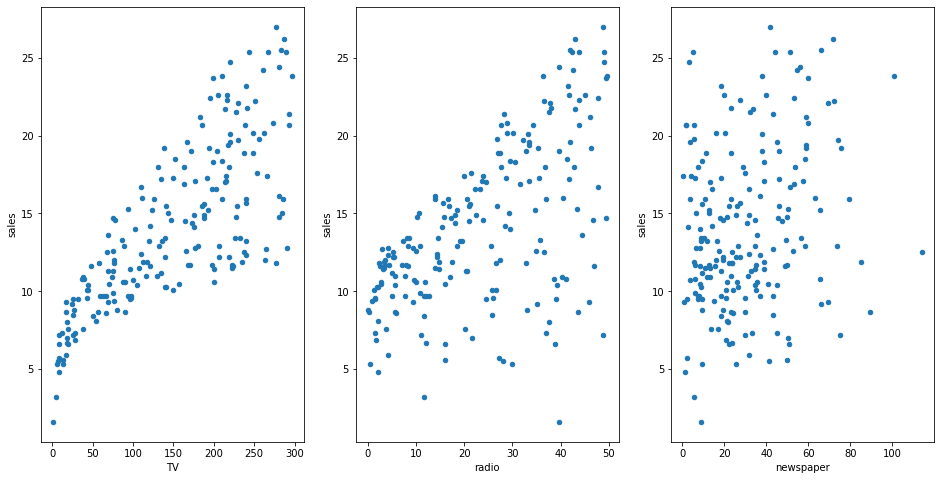

In [5]:
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2]);

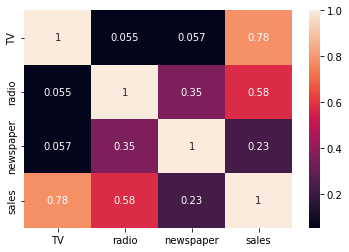

In [6]:
sns.heatmap(data.corr(), annot = True);

#### Selected any one feature from the three features

In [7]:
## I selected Tv. You can select others
features = data[['TV']]
target = data[['sales']].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 6)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
my_first_model = LinearRegression()

At this stage my m and c values are initialized to some random value. We need to train the model to find the optimal value of the weights(parameters) of the Linear Regression model.

In [13]:
my_first_model.fit(X_train,y_train)

LinearRegression()

In [14]:
my_first_model.coef_

array([[0.04873499]])

In [15]:
my_first_model.intercept_

array([6.70910349])

Interpreting the coefficients

1. A unit increase in TV ad spending was associated with a .048 unit increase in Sales

OR 

1. An additional 1000 units spent on TV was associated with an increase in sales of 48.734 units 

You know that y = B1.x + B0

You have the values of B1(coeff) and B0(intercept). Hence, Given any value of x you can predict the value of y

Lets take an example and check this.

In a new market my spend on TV is 50 units. I want you to tell me the sales generated due to this spend

In [16]:
.048*50 + 6.709

9.109

Lets try to plot best fit line

In [17]:
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
X_new.head()

TV
0    0.7
1  296.4

In [18]:
preds = my_first_model.predict(X_new)
preds

array([[ 6.74321798],
       [21.15415314]])

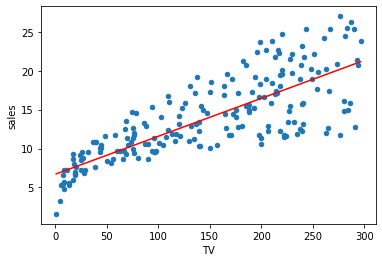

In [19]:
data.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new,preds,c='red');

### Statistical Significance of Coeff

In [20]:
import statsmodels.formula.api as smf

In [21]:
my_stat_model = smf.ols(formula='sales ~ TV', data=data).fit()
my_stat_model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

### Hypothesis Testing

H0 : There is no relationship between independent(TV) variable and dependent(sales) variable

H1 : There is a relationship between independent(TV) variable and dependent(Sales) variable

if my p value for TV is less than .05 then I will reject the null hypothesis

### Evaluation

To complete the supervised learning flow follow the below steps after fitting the model

In [22]:
my_model_preds = my_first_model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
#MAE
mean_absolute_error(my_model_preds,y_test)

2.469197684055691

In [25]:
#MSE
mean_squared_error(my_model_preds,y_test)

9.50319169686634

In [26]:
#RMSE
np.sqrt(mean_squared_error(my_model_preds,y_test))

3.082724719605424

In [27]:
#R Squared
my_first_model.score(X_test,y_test)

0.5600153407297689